#Fastfood Nutrition EDA

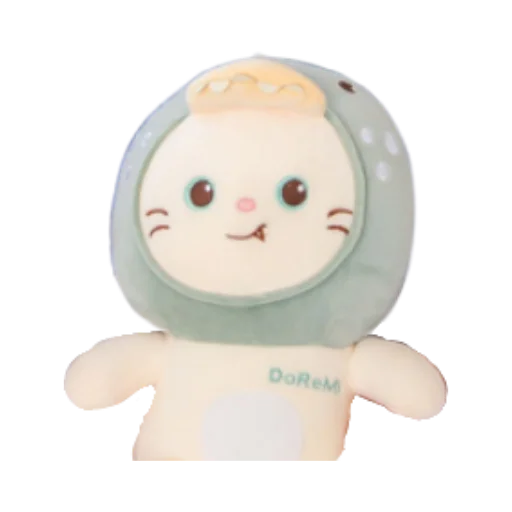

# —Å—Å—ã–ª–∫–∞ –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç kaggle: https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition

–î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –±–ª—é–¥–∞—Ö –∏–∑ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Å–µ—Ç–µ–π –±—ã—Å—Ç—Ä–æ–≥–æ –ø–∏—Ç–∞–Ω–∏—è –≤ –°–®–ê. –í –Ω–µ–º —Å–æ–±—Ä–∞–Ω–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞—Ö (Mcdonalds, Taco Bell, Subway, ...), –±–ª—é–¥–∞—Ö (Artisan Grilled Chicken Sandwich, Single Bacon Smokehouse Burger), –∫–∞–ª–æ—Ä–∏—è—Ö, –∫–∞–ª–æ—Ä–∏—è—Ö –æ—Ç —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è –∂–∏—Ä–∞, —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∂–∏—Ä–∞, –Ω–∞—Å—ã—â–µ–Ω–Ω–æ–≥–æ –∂–∏—Ä–∞, —Ç—Ä–∞–Ω—Å-–∂–∏—Ä–æ–≤, —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞, –Ω–∞—Ç—Ä–∏—è, —É–≥–ª–µ–≤–æ–¥–æ–≤, –ø–∏—â–µ–≤—ã—Ö –≤–æ–ª–æ–∫–æ–Ω, —Å–∞—Ö–∞—Ä–∞, –±–µ–ª–∫–æ–≤, –≤–∏—Ç–∞–º–∏–Ω–æ–≤ –ê –∏ –°, –∫–∞–ª—å—Ü–∏—è –∏ —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –±–ª—é–¥–æ —Å–∞–ª–∞—Ç–æ–º (*—Å–ø–æ–π–ª–µ—Ä: —ç—Ç–∞ –∫–æ–ª–æ–Ω–∫–∞ –±–∏—Ç–∞—è).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings

In [ ]:
sns.set_style('darkgrid') 
warnings.filterwarnings('ignore') #to hide pandas warnings

url='https://kodomo.fbb.msu.ru/~varyaaas/term4/files/fastfood.csv'
df = pd.read_csv(url)
df.head()

restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  
0     11     37.0    4.0   20.0     20.0  Other  
1     18     46.0    6.0   20.0     20.0  Other  
2     18     70.0   10.0   20.0     50.0  Other  
3     18     55.0    6.0   25.0     20.0  Other  
4     18     46.0    6.0   20.0     20.0  Other

## –û–±—â–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ—Å—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ. 

*–î–ª—è —Å–ø—Ä–∞–≤–∫–∏:*

**Taco Bell** - –æ–¥–Ω–∞ –∏–∑ —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Å–µ—Ç–µ–π –±—ã—Å—Ç—Ä–æ–≥–æ –ø–∏—Ç–∞–Ω–∏—è –≤ –°–®–ê ‚Äî –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç –º–µ–Ω—é, –≤–¥–æ—Ö–Ω–æ–≤–ª–µ–Ω–Ω–æ–µ —Ç—Ä–∞–¥–∏—Ü–∏–æ–Ω–Ω–æ–π –º–µ–∫—Å–∏–∫–∞–Ω—Å–∫–æ–π –∫—É—Ö–Ω–µ–π. –ï–≥–æ –≤–∞—Ä–∏–∞–Ω—Ç—ã –µ–¥—ã –≤–∫–ª—é—á–∞—é—Ç —à–∏—Ä–æ–∫–∏–π –≤—ã–±–æ—Ä —Ç–∞–∫–æ, –Ω–∞—á–æ—Å –∏ –±—É—Ä—Ä–∏—Ç–æ. 

**Arby's** ‚Äî –≤—Ç–æ—Ä–∞—è –ø–æ —á–∏—Å–ª—É —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ —Å–µ—Ç—å –±—ã—Å—Ç—Ä–æ–≥–æ –ø–∏—Ç–∞–Ω–∏—è –≤ –°–®–ê. –°–ø–µ—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è –Ω–∞ –ø—Ä–æ–¥–∞–∂–µ —Å—ç–Ω–¥–≤–∏—á–µ–π.

**Sonic** ‚Äî —Å–µ—Ç—å, —Ä–µ–∞–ª–∏–∑—É—é—â–∞—è —Ç–∏–ø–∏—á–Ω—ã–π —Ñ–∞—Å—Ç—Ñ—É–¥, –Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –∑–∞–±–∞–≤–Ω—ã–º –∫–æ–Ω—Ü–µ–ø—Ç–æ–º: –∫–ª–∏–µ–Ω—Ç—ã —Å–∏–¥—è—Ç –≤ –ø—Ä–∏–ø–∞—Ä–∫–æ–≤–∞–Ω–Ω—ã—Ö –º–∞—à–∏–Ω–∞—Ö –∏ –¥–µ–ª–∞—é—Ç –∑–∞–∫–∞–∑ –ø–æ –≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–π —Å–≤—è–∑–∏, –∞ –µ–¥—É –∏–º –ø—Ä–∏–Ω–æ—Å—è—Ç "–æ—Ñ–∏—Ü–∏–∞–Ω—Ç—ã" (carhops)

**Dairy Queen** ‚Äî —ç—Ç–æ —Å–≤–æ–µ–æ–±—Ä–∞–∑–Ω–∞—è –∫–ª–∞—Å—Å–∏–∫–∞ —Ñ–∞—Å—Ç-—Ñ—É–¥–∞. –í –∑–∞–≤–µ–¥–µ–Ω–∏–∏ –æ—á–µ–Ω—å –≥–æ—Ä–¥—è—Ç—Å—è —Å–≤–æ–∏–º –º–æ—Ä–æ–∂–µ–Ω—ã–º, –ø–æ–¥–∞–≤–∞—è —Å–∞–º–æ–µ –∑–Ω–∞–º–µ–Ω–∏—Ç–æ–µ –∏–∑ –Ω–∏—Ö "Blizzard" –≤ –ø–µ—Ä–µ–≤–µ—Ä–Ω—É—Ç–æ–º –≤–∏–¥–µ, –ø–æ–∫–∞–∑—ã–≤–∞—è –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ç–∞.

**Chick Fil-A** ‚Äî —Å–µ—Ç—å, —Å–ø–µ—Ü–∏–∞–ª–∏–∑–∏—Ä—É—é—â–∞—Å—è –Ω–∞ –ø—Ä–æ–¥–∞–∂–µ —Å—ç–Ω–¥–≤–∏—á–µ–π —Å –∫—É—Ä–∏—Ü–µ–π.

–ù–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–ª—é–¥ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ –¥–ª—è Taco Bell, –Ω–∞–∏–º–µ–Ω—å—à–µ–µ ‚Äî –¥–ª—è Chick Fil-A. 

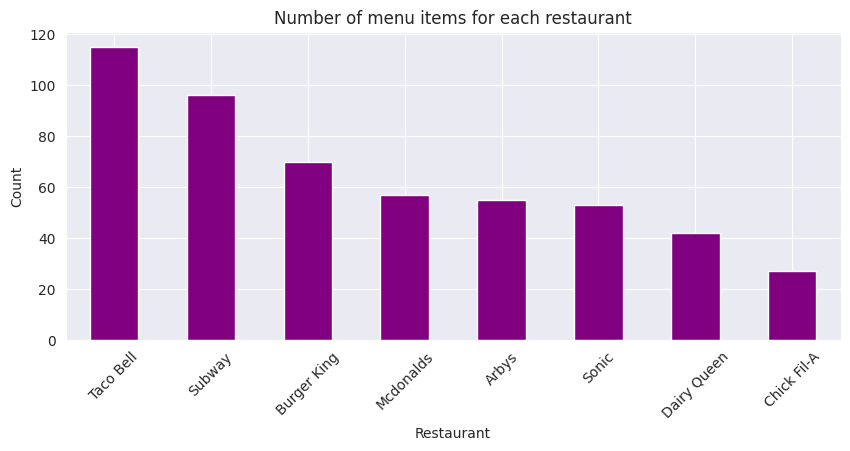

In [ ]:
plt.figure(figsize=(10, 4), dpi=100)
restaurant_category = df.restaurant.value_counts()
restaurant_category.plot.bar(color = 'purple')
plt.title('Number of menu items for each restaurant')
plt.ylabel('Count')
plt.xlabel('Restaurant')
plt.xticks(rotation=45)
plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø–∏—â–µ–≤—É—é —Ü–µ–Ω–Ω–æ—Å—Ç—å –¥–µ—Å—è—Ç–∏ —Å–∞–º—ã—Ö –∫–∞–ª–æ—Ä–∏–π–Ω—ã—Ö –±–ª—é–¥ –≤ –¥–∞–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ.

–°–æ–≥–ª–∞—Å–Ω–æ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è–º –ú–∏–Ω–∑–¥—Ä–∞–≤–∞ –†–§, –≤ —Å—Ä–µ–¥–Ω–µ–º –º—É–∂—á–∏–Ω–∞–º —Ç—Ä–µ–±—É–µ—Ç—Å—è –æ—Ç 2150 –¥–æ 3800 –∫–∫–∞–ª/—Å—É—Ç–∫–∏, –∂–µ–Ω—â–∏–Ω–∞–º ‚Äî –æ—Ç 1700 –¥–æ 3000 –∫–∫–∞–ª/—Å—É—Ç–∫–∏. 

–§–∏–∑–∏–æ–ª–æ–≥–∏—á–µ—Å–∫–∞—è –ø–æ—Ç—Ä–µ–±–Ω–æ—Å—Ç—å –≤ –∂–∏—Ä–∞—Ö ‚Äì –æ—Ç 70 –¥–æ 154 –≥/—Å—É—Ç–∫–∏ –¥–ª—è –º—É–∂—á–∏–Ω –∏ –æ—Ç 60 –¥–æ 102 –≥/—Å—É—Ç–∫–∏ –¥–ª—è –∂–µ–Ω—â–∏–Ω.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –ø–µ—Ä–µ—á–∏—Å–ª–µ–Ω–Ω—ã–µ –±–ª—é–¥–∞ –º–æ–≥—É—Ç –ø–æ–ª–Ω–æ—Å—Ç—å—é –ø–æ–∫—Ä—ã—Ç—å —Å—É—Ç–æ—á–Ω—É—é –ø–æ—Ç—Ä–µ–±–Ω–æ—Å—Ç—å –≤ –∂–∏—Ä–∞—Ö –∏ –≤ —Å—Ä–µ–¥–Ω–µ–º –±–æ–ª—å—à–µ —á–µ–º –Ω–∞ –ø–æ–ª–æ–≤–∏–Ω—É —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–∏—Ç—å —Å—É—Ç–æ—á–Ω—É—é –ø–æ—Ç—Ä–µ–±–Ω–æ—Å—Ç—å –≤ –∫–∞–ª–æ—Ä–∏—è—Ö üò≤

In [ ]:
df.nlargest(n=10, columns=['calories'])[['restaurant','item','calories','total_fat']]

restaurant                                              item  calories  \
39     Mcdonalds        20 piece Buttermilk Crispy Chicken Tenders      2430   
44     Mcdonalds                        40 piece Chicken McNuggets      1770   
47     Mcdonalds  10 piece Sweet N' Spicy Honey BBQ Glazed Tenders      1600   
192  Burger King                           American Brewhouse King      1550   
38     Mcdonalds        12 piece Buttermilk Crispy Chicken Tenders      1510   
115        Sonic  Garlic Parmesan Dunked Ultimate Chicken Sandwich      1350   
98         Sonic    Super Sonic Bacon Double Cheeseburger (w/mayo)      1280   
270  Dairy Queen     6 Piece Chicken Strip Basket w/ Country Gravy      1260   
211  Burger King                                        Rodeo King      1250   
101        Sonic           Super Sonic Double Cheeseburger W/ Mayo      1220   

     total_fat  
39         141  
44         107  
47          66  
192        126  
38          88  
115        100  
98          92  
270         66  
211         82  
101         87

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞–ª–æ—Ä–∏–π–Ω–æ—Å—Ç–∏ –±–ª—é–¥ –ø–æ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞–º. 

–í–∏–¥–Ω–æ, —á—Ç–æ —Å–∞–º–æ–µ "–∞–¥–µ–∫–≤–∞—Ç–Ω–æ–µ" —Ä–∞—Å–ø—Ä–µ–¥–µ–Ω–∏–µ –¥–ª—è —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ Chick Fil-A, $75$% –±–ª—é–¥ –∏–º–µ—é—Ç –∫–∞–ª–æ—Ä–∏–π–Ω–æ—Å—Ç—å –º–µ–Ω–µ–µ $500$, –∞ –≤—Å–µ –±–ª—é–¥–∞, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ª–µ–∂–∞—Ç –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö $1000$ (—É Taco Bell, –∫—Å—Ç–∞—Ç–∏, —Ç–æ–∂–µ).

–õ—é–±–æ–ø—ã—Ç–Ω–æ, —á—Ç–æ –¥–ª—è Burger King, Mcdonalds, Sonic –∏ Subway —Ç—Ä–µ—Ç–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤ –∏ —Ä–∞–≤–µ–Ω $750$ –∫–∫–∞–ª. 


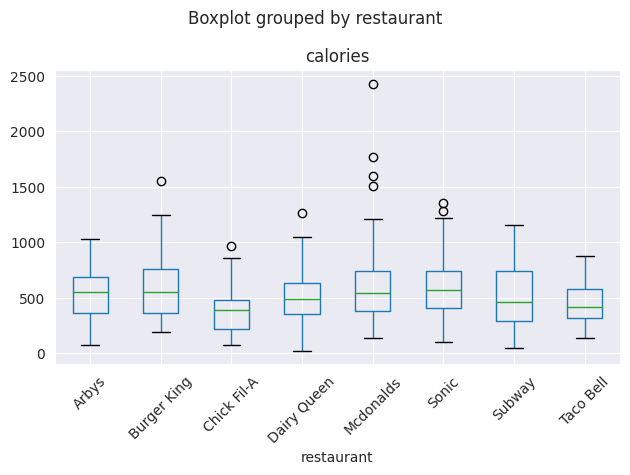

In [ ]:
df.boxplot(column='calories', by='restaurant')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∏ –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

–í—ã–¥–≤–∏–Ω–µ–º –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ, —á–µ–º –∂–∏—Ä–Ω–µ–µ –ø–∏—â–∞, —Ç–µ–º –æ–Ω–∞ –∫–∞–ª–æ—Ä–∏–π–Ω–µ–µ. 

$H_0:$ –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–µ—Ç

$H_1:$ –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –µ—Å—Ç—å

–ü–æ—Å—Ç—Ä–æ–∏–º —Ç–æ—á–µ—á–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∫–∞–ª–æ—Ä–∏–π–Ω–æ—Å—Ç–∏ –±–ª—é–¥ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∂–∏—Ä–∞ –≤ –Ω–µ–º. –í –Ω–µ–º –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. 

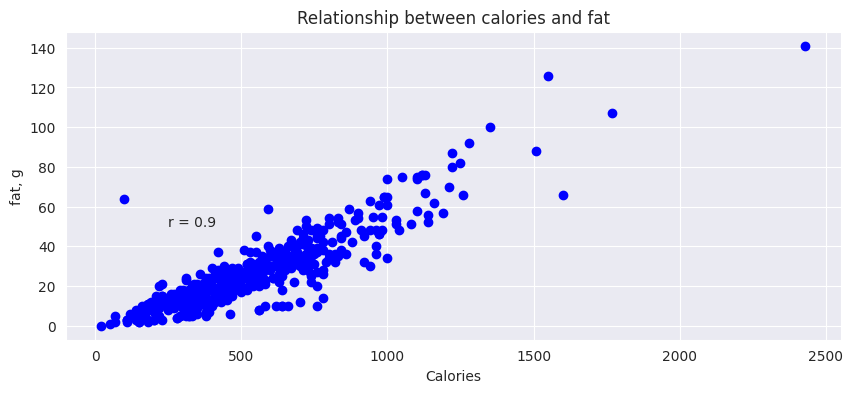

In [ ]:
correlation = df['calories'].corr(df['total_fat'], method='pearson')

plt.figure(figsize=(10, 4), dpi=100)
plt.scatter(df.calories, df.total_fat, color='blue')
plt.text(250,50,'r = {}'.format(round(correlation,2)))
plt.xlabel('Calories')
plt.ylabel('fat, g')
plt.title('Relationship between calories and fat')
plt.show()

–ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—É –æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–∞ 5 –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–º —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏.

$p$-$value = 1.17\cdot10^{-187}$

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ü–∏—Ä—Å–æ–Ω–∞ –±–ª–∏–∑–∫–∏–π –∫ –µ–¥–∏–Ω–∏—Ü–µ –∏ –º–∞–ª–µ–Ω—å–∫–∏–π $p$-$value$ –≥–æ–≤–æ—Ä—è—Ç –Ω–∞–º –æ –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –Ω–∞—à–∞ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ–± –æ—Ç—Å—É—Å—Ç–≤–∏–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∫–∞–ª–æ—Ä–∏–π–Ω–æ—Å—Ç–∏ –∏ –∂–∏—Ä–Ω–æ—Å—Ç–∏ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è, –∏ –≤–µ—Ä–Ω–∞ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è - –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –µ—Å—Ç—å.



In [ ]:
ss.pearsonr(df['calories'],df['total_fat']) #–¥—Ä—É–≥–æ–π –º–µ—Ç–æ–¥ –ø–æ–¥—Å—á–µ—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–π —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç p-value

PearsonRResult(statistic=0.9004936961298489, pvalue=1.174655042626809e-187)

–ü–æ—Å—Ç—Ä–æ–∏–º –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, —Ä–∞–∑–¥–µ–ª–∏–≤ –Ω–∞—à—É –≤—ã–±–æ—Ä–∫—É –Ω–∞ train –∏ test

–ó–∞–¥–∞—á–∞ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ - –ø–æ–¥–æ–±—Ä–∞—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –ø—Ä—è–º–æ–π $k$ –∏ $b$ –ø–æ –Ω–∞—à–µ–π –∏—Å—Ö–æ–¥–Ω–æ–π —Ä–∞–∑–º–µ—á–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.

–¢–æ –µ—Å—Ç—å –Ω–∞—à –∞–ª–≥–æ—Ä–∏—Ç–º —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏–º–µ–µ—Ç –≤–∏–¥ $$f(x) = kx + b$$

–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –æ—Ü–µ–Ω–µ–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º $R^2$-score:

$$R^2 = 1 - \frac{‚àë\limits_{i=1}^N(f(x_i) - y_i)^2}{‚àë\limits_{i=1}^N(y_i - \bar{y_i})^2}$$

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç $0$ –¥–æ $1$. –ß–µ–º –±–ª–∏–∂–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –∫ $1$, —Ç–µ–º —Å–∏–ª—å–Ω–µ–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å.

–í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ $R^2 = 0.86925$, –µ—â–µ —Ä–∞–∑ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—è –ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å

–ö–∞—á–µ—Å—Ç–≤–æ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: r2_score=0.8692508605788695


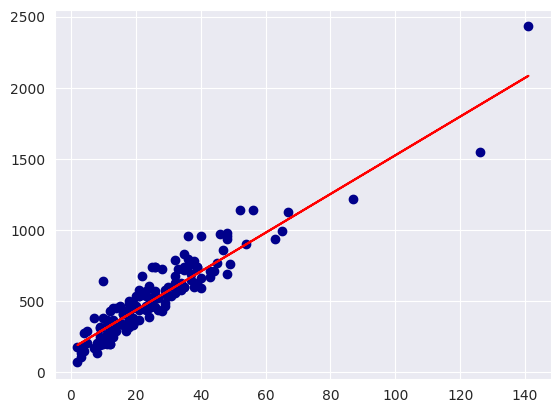

In [ ]:
X, y = np.array(df['total_fat']).reshape(-1,1), np.array(df['calories']).reshape(-1,1)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
y_pred = LinReg.predict(x_test)


print(f'–ö–∞—á–µ—Å—Ç–≤–æ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: r2_score={r2_score(y_test, y_pred)}')

plt.scatter(x_test, y_test, color ='darkblue')
plt.plot(x_test, y_pred, color ='red')
plt.show()

–í—Å–ø–æ–º–Ω–∏–ª–∞ –æ —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏–∏ heatmap, –ø–æ–∫–∞–∑—ã–≤–∞—é—â–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É —Å—Ç–æ–ª–±—Ü–∞–º–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞.

–ò–∑ –Ω–µ–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞–∏–±–æ–ª—å—à–∏–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —É –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∂–∏—Ä–∞ –∏ –∫–∞–ª–æ—Ä–∏–π –∏–∑ –∂–∏—Ä–∞, —á—Ç–æ –≤–ø–æ–ª–Ω–µ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–æ. 
–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–µ–ª–∫–∞ –∏ —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ —Ç–æ–∂–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç..

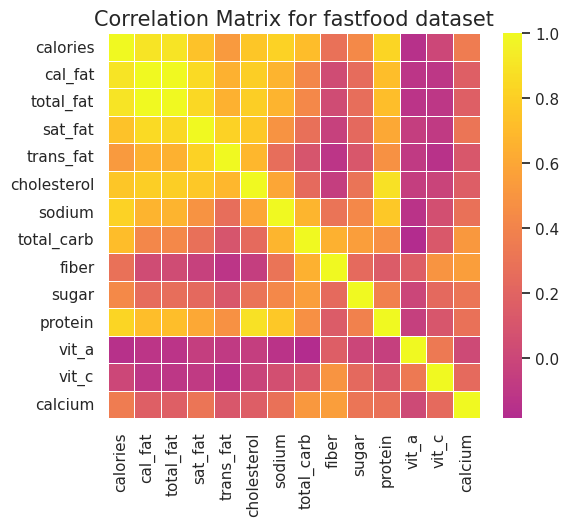

In [ ]:
plt.figure(figsize=(6, 5))
plt.title(f'Correlation Matrix for fastfood dataset', fontsize=15)
sns.heatmap(df.corr(), cmap='plasma', center=0, linewidths=.5)
plt.show()

##–î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏ –µ–≥–æ –∞–Ω–∞–ª–∏–∑

–¢–∞–∫ –∫–∞–∫ –∫–æ–ª–æ–Ω–∫–∞ Salad —É –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ—á–µ–º—É-—Ç–æ –±–∏—Ç–∞—è (–≤–µ–∑–¥–µ –∫–∞—Ç–µ–≥–æ—Ä–∏—è Other), —Å–¥–µ–ª–∞–µ–º —Å–≤–æ—é —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é, –Ω–∞–π–¥—è –∫–æ–ª–æ–Ω–∫–∏ —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —Å–ª–æ–≤–æ "Salad". 

–î–∞–ª–µ–µ —è –≤—Ä—É—á–Ω—É—é –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∞ –ø–æ–ª—É—á–µ–Ω–Ω—É—é —Ç–∞–±–ª–∏—á–∫—É –∏ —É–±—Ä–∞–ª–∞ –∏–∑ —Å–∞–ª–∞—Ç–æ–≤ —Å–ª–µ–¥—É—é—â–∏–µ –±–ª—é–¥–∞: Chicken Salad Sandwich, Pecan Chicken Salad Flatbread, Pecan Chicken Salad Sandwich (—Ö–æ—Ç—è —Å—É–¥—è –ø–æ –∫–∞—Ä—Ç–∏–Ω–∫–∞–º –≤—Å–µ —ç—Ç–∏ –±–ª—é–¥–∞ —è–≤–ª—è—é—Ç—Å—è —á–µ–º-—Ç–æ —Å—Ä–µ–¥–Ω–∏–º –º–µ–∂–¥—É —Å–∞–ª–∞—Ç–æ–º –∏ —Å—ç–Ω–¥–≤–∏—á–µ–º)




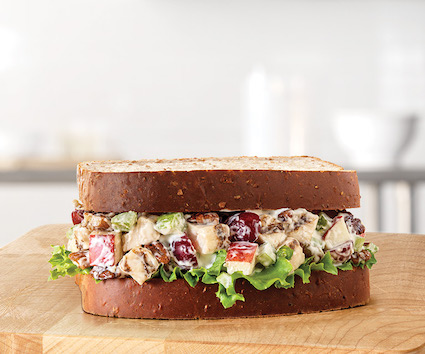

In [ ]:
sal = df[df['item'].str.contains('Salad') == True]
sal1 = sal.iloc[0:9]
sal2 = sal.iloc[12:]
salad_tab = pd.concat([sal1, sal2], axis=0)
df.loc[salad_tab['item'].index, 'salad'] = True
df.tail()

restaurant                            item  calories  cal_fat  total_fat  \
510  Taco Bell  Spicy Triple Double Crunchwrap       780      340         38   
511  Taco Bell     Express Taco Salad w/ Chips       580      260         29   
512  Taco Bell          Fiesta Taco Salad-Beef       780      380         42   
513  Taco Bell       Fiesta Taco Salad-Chicken       720      320         35   
514  Taco Bell         Fiesta Taco Salad-Steak       720      320         36   

     sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  sugar  \
510     10.0        0.5           50    1850          87    9.0      8   
511      9.0        1.0           60    1270          59    8.0      7   
512     10.0        1.0           60    1340          74   11.0      7   
513      7.0        0.0           70    1260          70    8.0      8   
514      8.0        1.0           55    1340          70    8.0      8   

     protein  vit_a  vit_c  calcium  salad  
510     23.0   20.0   10.0     25.0  Other  
511     23.0    NaN    NaN      NaN   True  
512     26.0    NaN    NaN      NaN   True  
513     32.0    NaN    NaN      NaN   True  
514     28.0    NaN    NaN      NaN   True

–ê —Ç–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—á–∫—É —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –Ω–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ "—Å–∞–ª–∞—Ç—ã" –∏ "–¥—Ä—É–≥–∏–µ" 

(–∫ —Å–ª–æ–≤—É, –æ—Ç–º–µ—á—É, —á—Ç–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –¥–∞–Ω–Ω—ã–µ —Ç–æ–ª—å–∫–æ –ø–æ –æ—Å–Ω–æ–≤—ã–º –±–ª—é–¥–∞–º - –∑–∞–∫—É—Å–∫–∏, –¥–µ—Å–µ—Ä—Ç—ã –∏ –Ω–∞–ø–∏—Ç–∫–∏ –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã)

–ú–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å –º–µ–Ω—å—à—É—é –∫–∞–ª–æ—Ä–∏–π–Ω–æ—Å—Ç—å, —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∂–∏—Ä–æ–≤ –∏ —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ –≤ —Å–∞–ª–∞—Ç–∞—Ö, –Ω–æ –ø—Ä–∏ —ç—Ç–æ–º –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–µ–µ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –≤–∏—Ç–∞–º–∏–Ω–æ–≤ –ê –∏ –°. 

In [ ]:
df.groupby('salad').mean()

calories     cal_fat  total_fat   sat_fat  trans_fat  cholesterol  \
salad                                                                        
True   352.459016  177.786885  19.770492  5.639344   0.147541    60.655738   
Other  554.889868  247.013216  27.506608  8.491189   0.507709    74.041850   

            sodium  total_carb     fiber     sugar    protein      vit_a  \
salad                                                                      
True    931.639344   22.049180  4.442623  7.131148  22.672131  75.657895   
Other  1289.074890   48.837004  4.095023  7.279736  28.593819  10.650190   

           vit_c    calcium  
salad                        
True   48.552632  12.000000  
Other  16.131086  26.681648

–ù–∞–≥–ª—è–¥–Ω—ã–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–Ω–∏—è –≤–∏—Ç–∞–º–∏–Ω–æ–≤ –≤ —Å–∞–ª–∞—Ç–∞—Ö –∏ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –±–ª—é–¥–∞—Ö

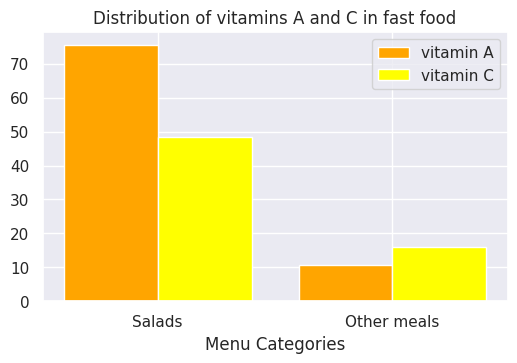

In [ ]:
plt.figure(figsize=(6, 3.5), dpi=100)

vit_a = df.groupby('salad')['vit_a'].mean()
vit_c = df.groupby('salad')['vit_c'].mean()

category = vit_c.index
vt_a = vit_a.values
vt_c = vit_c.values

X_axis = np.arange(len(category))

plt.bar(X_axis - 0.2, vt_a, 0.4, label = 'vitamin A', color = 'orange')
plt.bar(X_axis + 0.2, vt_c, 0.4, label = 'vitamin C', color = 'yellow')

plt.xticks(X_axis, ['Salads', 'Other meals'])
plt.xlabel('Menu Categories')
plt.title('Distribution of vitamins A and C in fast food')
plt.legend()
plt.show()

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞—Å—ã—â–µ–Ω–Ω—ã—Ö –∏ —Ç—Ä–∞–Ω—Å-–∂–∏—Ä–æ–≤ –≤ —Å–∞–ª–∞—Ç–∞—Ö –∏ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –±–ª—é–¥–∞—Ö

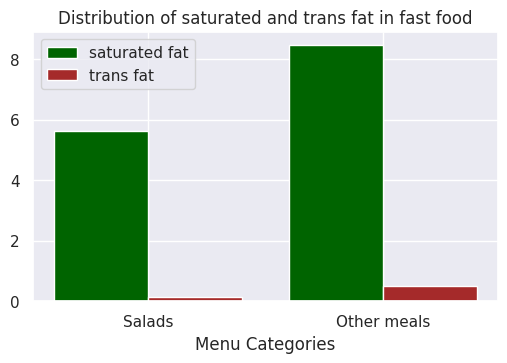

In [ ]:
plt.figure(figsize=(6, 3.5), dpi=100)
sat_fat = df.groupby('salad')['sat_fat'].mean()
trans_fat = df.groupby('salad')['trans_fat'].mean()

category = sat_fat.index
sat_f = sat_fat.values
trans_f = trans_fat.values

X_axis = np.arange(len(category))

plt.bar(X_axis - 0.2, sat_f, 0.4, label = 'saturated fat', color = 'darkgreen')
plt.bar(X_axis + 0.2, trans_f, 0.4, label = 'trans fat', color = 'brown')

plt.xticks(X_axis, ['Salads', 'Other meals'])
plt.xlabel('Menu Categories')
plt.title('Distribution of saturated and trans fat in fast food')
plt.legend()
plt.show()

–ü–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–∞–ª—å—Ü–∏—è –∏ –Ω–∞—Ç—Ä–∏—è –≤ –±–ª—é–¥–∞—Ö.

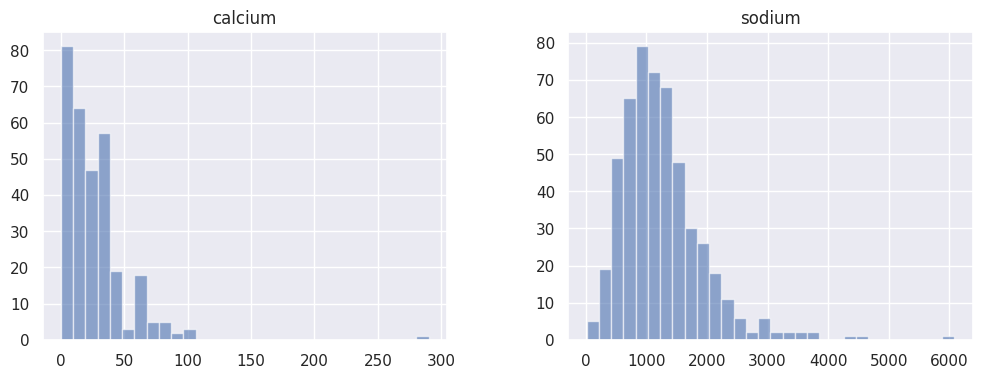

In [ ]:
df[['calcium','sodium']].hist(bins=30,figsize=(12,4), alpha=0.6)
plt.show()

–í–∏–∑—É–∞–ª—å–Ω–æ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞—Ç—Ä–∏—è –ø–æ—Ö–æ–∂–∞ –Ω–∞ –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è 

$H_0:$ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∏—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é

$H_1:$ –Ω–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∏—Ç 

–ü—Ä–æ–≤–µ—Ä–∏–º —ç—Ç–æ —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞. –î–∞–Ω–Ω—ã–π —Ç–µ—Å—Ç –ø—Ä–æ–≤–µ—Ä—è–µ—Ç —Å–æ–≥–ª–∞—Å—É–µ—Ç—Å—è –ª–∏ –≤—ã–±–æ—Ä–∫–∞ —Å –∑–∞—Ä–∞–Ω–µ–µ –≤—ã–±—Ä–∞–Ω–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º. 

–î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Ü–µ–Ω—Ç—Ä–∏—Ä—É–µ–º –∏ –Ω–æ—Ä–º–∏—Ä—É–µ–º –Ω–∞—à—É –≤—ã–±–æ—Ä–∫—É, –ø–æ—Å–ª–µ —á–µ–≥–æ –º—ã –º–æ–∂–µ–º –ø—Ä–æ–≤–µ—Ä—è—Ç—å –µ–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–º—É –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É $N(0,1)$ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.

$p$-$value = 0.000115$, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è


In [ ]:
sod_stand = (df['sodium'] - df['sodium'].mean())/(df['sodium'].std())
ss.kstest(sod_stand, 'norm')

KstestResult(statistic=0.0969389495795192, pvalue=0.00011542989318020063, statistic_location=0.1641589008409839, statistic_sign=1)

##–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è

–ü–æ–ø—Ä–æ–±—É–µ–º –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞—Ç—å –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ —Ç—Ä–∏ –∫–ª–∞—Å—Ç–µ—Ä–∞, –æ–∂–∏–¥–∞—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –µ–¥—ã –ø–æ —Å—Ç–µ–ø–µ–Ω–∏ "–≤—Ä–µ–¥–Ω–æ—Å—Ç–∏". –î–ª—è –Ω–∞—á–∞–ª–∞ —É–¥–∞–ª–∏–º –∫–æ–ª–æ–Ω–∫–∏ —Å –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º NaN –∏ –∑–∞–ø–æ–ª–Ω–∏–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ NaN —Å—Ä–µ–¥–Ω–∏–º –ø–æ —Å—Ç–æ–ª–±—Ü—É (—ç—Ç–æ —É–º–µ—Å—Ç–Ω–æ, —Ç–∞–∫ –∫–∞–∫ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–º–µ—Ä–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏—Ö –Ω–µ–º–Ω–æ–≥–æ). –¢–∞–∫–∂–µ —É–¥–∞–ª–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏

In [ ]:
df.isnull().sum() #NaN count

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [ ]:
df_num = df.select_dtypes(exclude='object')

df_num.drop(columns=['vit_a','vit_c','calcium'],inplace=True)
df_num.fiber.fillna(df.fiber.mean(),inplace=True)
df_num.protein.fillna(df.protein.mean(),inplace=True)

df_num.head()

calories  cal_fat  total_fat  sat_fat  trans_fat  cholesterol  sodium  \
0       380       60          7      2.0        0.0           95    1110   
1       840      410         45     17.0        1.5          130    1580   
2      1130      600         67     27.0        3.0          220    1920   
3       750      280         31     10.0        0.5          155    1940   
4       920      410         45     12.0        0.5          120    1980   

   total_carb  fiber  sugar  protein  
0          44    3.0     11     37.0  
1          62    2.0     18     46.0  
2          63    3.0     18     70.0  
3          62    2.0     18     55.0  
4          81    4.0     18     46.0

–û–¥–∏–Ω –∏–∑ —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è **$k$-means**. –û–Ω –ø–æ–≤—Å–µ–º–µ—Å—Ç–Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏. *–ê–ª–≥–æ—Ä–∏—Ç–º $k$ —Å—Ä–µ–¥–Ω–∏—Ö* —è–≤–ª—è–µ—Ç—Å—è —á–∞—Å—Ç–Ω—ã–º —Å–ª—É—á–∞–µ–º –±–æ–ª–µ–µ –æ–±—â–µ–≥–æ **EM-–∞–ª–≥–æ—Ä–∏—Ç–º–∞**.

*–ê–ª–≥–æ—Ä–∏—Ç–º:*

> –ó–∞–¥–∞–¥–∏–º—Å—è –Ω–∞—á–∞–ª—å–Ω—ã–º –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ–º —Ü–µ–Ω—Ç—Ä–æ–≤ –∏—Å–∫–æ–º—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ $\Omega_0 = (\omega_1^0 ... \omega_k^0)$

> –ü–æ–∫–∞ –Ω–µ –¥–æ—Å—Ç–∏–≥–Ω—É—Ç–∞ —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å:
> >1. –ü–æ—Å—á–∏—Ç–∞–µ–º, –∫–∞–∫–∏–º –∫–ª–∞—Å—Ç–µ—Ä–∞–º –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—Ç —Ç–æ—á–∫–∏ –∏–º–µ—é—â–µ–≥–æ—Å—è –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ —Ç–µ–∫—É—â–µ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è $G_i$: $g_j^i := \arg\min\limits_{p = 1 ... k}(\rho(\Omega_p^{i-1}, x_j))$ –¥–ª—è –≤—Å–µ—Ö $x_j$ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞.

> >2. –ù–∞ –æ—Å–Ω–æ–≤–µ –ø–æ—Å—á–∏—Ç–∞–Ω–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º $G = (g_1^i ... g_N^i )$ –ø–µ—Ä–µ—Å—á–∏—Ç–∞–µ–º –Ω–æ–≤—ã–µ —Ü–µ–Ω—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ $\Omega_i = (\omega_1^i ... \omega_k^i)$.




–í —Å–ª—É—á–∞–µ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ $k$-means –≤–æ–æ–±—â–µ –≥–æ–≤–æ—Ä—è –ø—Ä–µ–¥–ø–æ–ª–æ–≥–∞–µ—Ç—Å—è, —á—Ç–æ –º—ã –∑–Ω–∞–µ–º —ç—Ç–æ $k$ - —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –Ω–æ –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ –æ–Ω–æ –ø–æ–¥–±–∏—Ä–∞–µ—Ç—Å—è –æ–ø—ã—Ç–Ω—ã–º –ø—É—Ç–µ–º. 

–í –º–æ–µ–º —Å–ª—É—á–∞–µ $k = 3$, –ø–æ—Ç–æ–º—É —á—Ç–æ —è —Ä–µ—à–∏–ª–∞ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –µ–¥—É –ø–æ —Å—Ç–µ–ø–µ–Ω–∏ –≤—Ä–µ–¥–Ω–æ—Å—Ç–∏ (–Ω–µ –æ—á–µ–Ω—å –≤—Ä–µ–¥–Ω–∞—è ('good'), –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Ä–µ–¥–Ω–∞—è ('not that bad') –∏ –≤—Ä–µ–¥–Ω–∞—è ('bad'))

In [ ]:
X = StandardScaler().fit_transform(df_num)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)

food_categories = {0: 'Good', 1: 'Not that bad', 2: 'Bad'}
y_pred = [food_categories[label] for label in y_pred]

df['Category'] = y_pred #adding the clasterization column to df

–í–∏–¥–Ω–æ, —á—Ç–æ –≤ —Ä–∞–∑–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö —Å—Ä–µ–¥–Ω—è—è –∫–∞–ª–æ—Ä–∏–π–Ω–æ—Å—Ç—å, —Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Ç–≤–æ –∂–∏—Ä–æ–≤, —Ö–æ–ª–µ—Å—Ç–µ—Ä–∏–Ω–∞ –∏ –ø—Ä–æ—á–∏—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è.

In [ ]:
df.groupby('Category').mean()

calories     cal_fat  total_fat    sat_fat  trans_fat  \
Category                                                                 
Bad           1176.060606  669.030303  73.606061  24.500000   2.348485   
Good           331.328413  137.523985  15.324723   4.592251   0.143911   
Not that bad   686.350711  301.620853  33.706161  10.170616   0.582938   

              cholesterol       sodium  total_carb     fiber      sugar  \
Category                                                                  
Bad            240.606061  2207.272727   59.848485  3.103448  12.484848   
Good            42.066421   818.265683   30.619926  3.178439   4.678967   
Not that bad    85.189573  1646.824645   62.767773  5.541463   9.763033   

                protein      vit_a      vit_c    calcium  
Category                                                  
Bad           68.812500  12.687500  17.352941  32.588235  
Good          18.092251  22.748387  19.373418  14.101266  
Not that bad  34.270142  14.976923  21.507692  36.907692

–ü–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è –∏ –æ–∫—Ä–∞—Å–∏–º –µ–µ –ø–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –∫–ª–∞—Å—Ç–µ—Ä–∞–º.

–í–∏–¥–Ω–æ, —á—Ç–æ –ø–æ—á—Ç–∏ –≤–µ–∑–¥–µ –æ—Å–æ–±–æ –Ω–µ—Ç —á–µ—Ç–∫–∏—Ö –≥—Ä–∞–Ω–∏—Ü –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –Ω–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –∫–ª–∞—Å—Ç–µ—Ä 'Good' (–∑–µ–ª–µ–Ω—ã–π) –≤–µ–∑–¥–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∏–∑–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è,  'Not that bad' (–æ—Ä–∞–Ω–∂–µ–≤—ã–π) - —Å—Ä–µ–¥–Ω–∏–µ, 'Bad' (–∫—Ä–∞—Å–Ω—ã–π) - –≤—ã—Å–æ–∫–∏–µ.

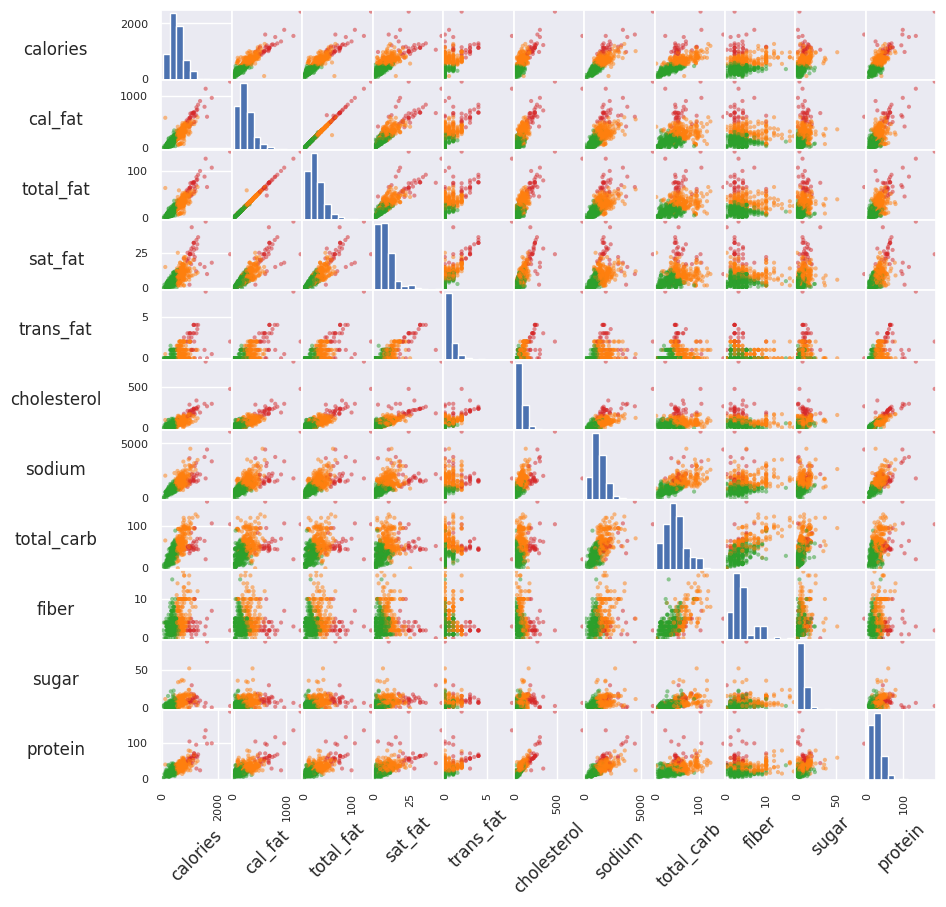

In [ ]:
colors = {'Bad':'tab:red', 'Not that bad':'tab:orange', 'Good':'tab:green'}
matrix = pd.plotting.scatter_matrix(df_num, alpha=0.5, c=df['Category'].map(colors))

[s.xaxis.label.set_rotation(45) for s in matrix.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in matrix.reshape(-1)]
[s.get_yaxis().set_label_coords(-1.5,0.3) for s in matrix.reshape(-1)]
plt.show()

–í –∫–æ–Ω—Ü–µ –ø–æ—Å—Ç—Ä–æ–∏–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É –ø–æ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞–º –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –µ–¥—ã.

–ò–∑ —Ç–∞–±–ª–∏—Ü—ã –≤–∏–¥–Ω–æ, —á—Ç–æ –ë–ö, –ú–∞–∫–¥–æ–Ω–∞–ª—å–¥—Å –∏ Sonic —è–≤–ª—è—é—Ç—Å—è –ª–∏–¥–µ—Ä–∞–º–∏ –ø–æ –ø–ª–æ—Ö–æ–π –µ–¥–µ, –≤ —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ Taco Bell —è–≤–ª—è–µ—Ç—Å—è –ª–∏–¥–µ—Ä–æ–º –ø–æ —Ö–æ—Ä–æ—à–µ–π –∏ –Ω–µ —Å–æ–¥–µ—Ä–∂–∏—Ç –Ω–∏ –æ–¥–Ω–æ–≥–æ –±–ª—é–¥–∞ –∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ 'Bad'.

–¢–∞–∫–∂–µ —ç—Ç–æ —Ö–æ—Ä–æ—à–æ –≤–∏–¥–Ω–æ –Ω–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ, –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω–æ–π –Ω–∏–∂–µ.

In [ ]:
pd.crosstab(df['restaurant'], df['Category'])

Category     Bad  Good  Not that bad
restaurant                          
Arbys          1    23            31
Burger King   13    31            26
Chick Fil-A    1    23             3
Dairy Queen    2    25            15
Mcdonalds      7    24            26
Sonic          7    24            22
Subway         2    50            44
Taco Bell      0    71            44

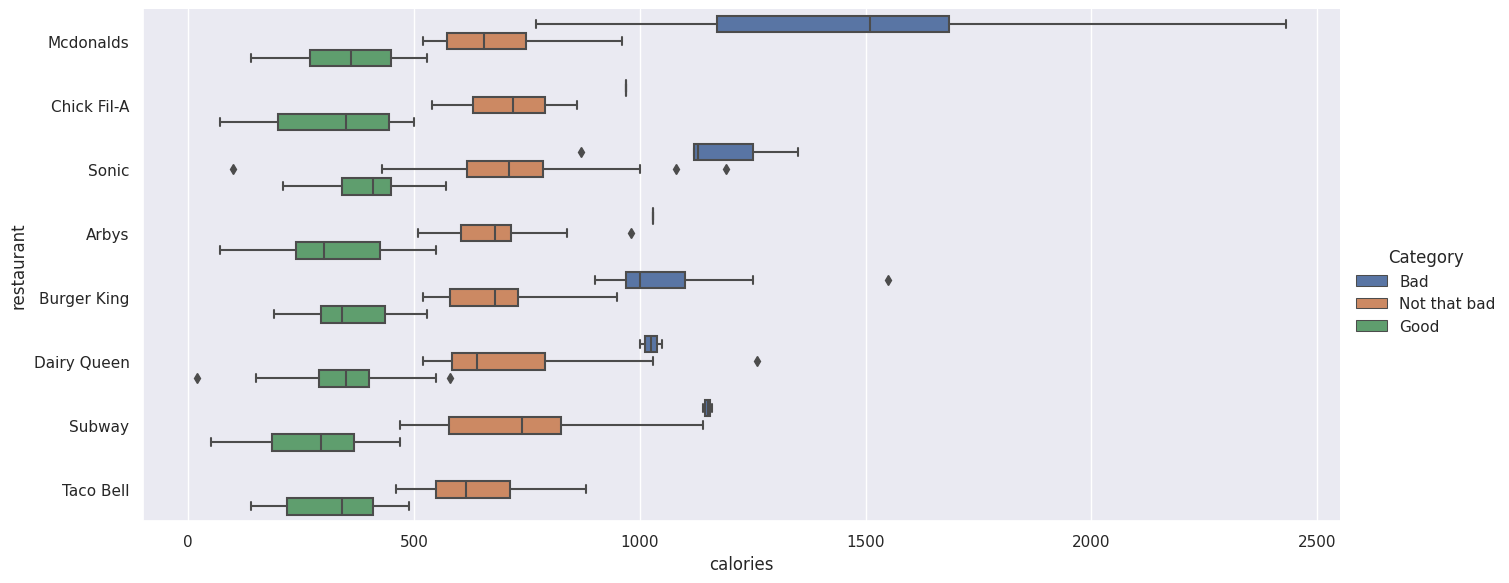

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
hue_order = ['Bad', 'Not that bad', 'Good']
sns.catplot(x='calories',
            y='restaurant', 
            hue='Category',
            kind='box', 
            data=df, height=6, aspect=2.3,
            hue_order=hue_order)
plt.show()

–ù–∞ —ç—Ç–æ–º –º–æ–π –Ω–µ–±–æ–ª—å—à–æ–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –∑–∞–≤–µ—Ä—à–µ–Ω.

**–í—ã–≤–æ–¥—ã:**

1) –ß–µ–º –∫–∞–ª–æ—Ä–∏–π–Ω–µ–µ –±–ª—é–¥–æ, —Ç–µ–º –≤—ã—à–µ –≤ –Ω–µ–º —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∂–∏—Ä–æ–≤ ($\alpha = 0.05$).

2) –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞–ª—å—Ü–∏—è –≤ –±–ª—é–¥–∞—Ö –Ω–µ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ ($\alpha = 0.
05$).

3) –ü–æ—Å—Ç—Ä–æ–µ–Ω–∞ –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∂–∏—Ä–∞ –ø–æ –∫–∞–ª–æ—Ä–∏–π–Ω–æ—Å—Ç–∏ (–∏–ª–∏ –Ω–∞–æ–±–æ—Ä–æ—Ç)

4) –ï–¥–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ –±—ã–ª–∞ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞–Ω–∞ –Ω–∞ —Ç—Ä–∏ –∫–ª–∞—Å—Ç–µ—Ä–∞: "–ø–æ–ª–µ–∑–Ω–∞—è", "—Å—Ä–µ–¥–Ω–µ –≤—Ä–µ–¥–Ω–∞—è", "–≤—Ä–µ–¥–Ω–∞—è"

5) –†–µ—Å—Ç–æ—Ä–∞–Ω Taco Bell –≤–ª—è–µ—Ç—Å—è –ª–∏–¥–µ—Ä–æ–º –ø–æ "–ø–æ–ª–µ–∑–Ω–æ–π" –µ–¥–µ. –ï–¥–∞ –≤ –ë–ö, –ú–∞–∫–¥–æ–Ω–∞–ª—å–¥—Å –∏ Sonic –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –≤—Ä–µ–¥–Ω–∞—è –∏–ª–∏ —Å—Ä–µ–¥–Ω–µ –≤—Ä–µ–¥–Ω–∞—è. 

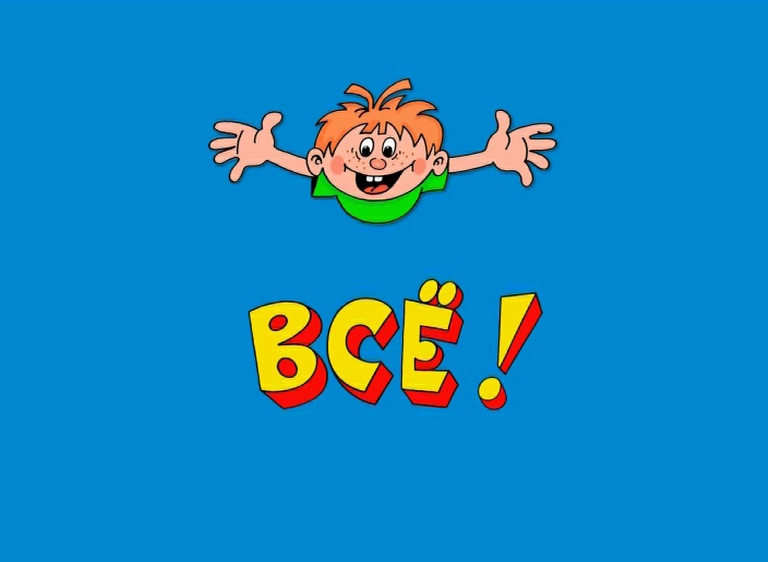